In [1]:
import xorbits

# Initialize Xorbits in the local environment.
xorbits.init()


2024-02-15 17:01:47,353 xorbits._mars.deploy.oscar.local 22082 WARNING  Web service started at http://0.0.0.0:20229


In [4]:
import pandas as pd


df = pd.read_csv('all-the-news-2-1.csv', nrows=100000)
df.to_csv('first_100000_rows.csv', index=False)


In [21]:
import pandas as pd

csv_file_path = 'all-the-news-2-1.csv'

row_number = 15768
df_specific_row = pd.read_csv(csv_file_path, skiprows=row_number, nrows=1, header=None)

header = pd.read_csv(csv_file_path, nrows=0)
df_specific_row.columns = header.columns

output_csv_path = '15769_row.csv'
df_specific_row.to_csv(output_csv_path, index=False)

print(f"The content of row {row_number + 1} has been saved to '{output_csv_path}'.")


The content of row 15769 has been saved to '15769_row.csv'.


In [7]:
#DROP particular Row, for example 15770 row(df.drop(15769, axis=0))

import pandas as pd
file_path = 'first_100000_rows.csv'
df = pd.read_csv(file_path)
df = df.drop(15769, axis=0)
df.to_csv('first_100000_rows.csv', index=False)


In [3]:
#Classic Pandas
from sentence_transformers import SentenceTransformer
import pandas as pd
import re
import torch

# Set device to GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SentenceTransformer('average_word_embeddings_komninos', device=device)

def prepare_data(data) -> pd.DataFrame:
    'Preprocesses data and prepares it for upsert.'
    # Add an id column
    print("Preparing data...")
    data["id"] = range(len(data))

    # Extract only first few sentences of each article for quicker vector calculations
    # We made a slight optimization when generating data['article']    
    # Original version:
    # data['article'] = data.article.apply(lambda x: ' '.join(re.split(r'(?<=[.:;])\s', x)[:4]))

    # Optimized version:
    def helper(x):
        count = 0
        idx = -1
        x = str(x)
        for match in re.finditer(r'(?<=[.:;])\s', x):
            count += 1
            if count == 4:
                idx = match.start() if match.start() != match.end() else match.start() + 1
                break
        return x[:idx]

    data['article'] = data['article'].fillna('')
    data['article1'] = data.article.apply(helper)
    
    s2 = data['title'].str.cat(list(data['article1']), sep="")
    
    print('Encoding articles...')
    encoded_articles = s2.apply(lambda x : list(map(float, model.encode(x))))
    data['article_vector'] = encoded_articles
    return data




# Use part of the dataset because using the complete dataset may require more time
data = pd.read_csv('first_100000_rows.csv', nrows=50000)
prepared_data = prepare_data(data)


/Users/antoniozhou/anaconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Preparing data...
Encoding articles...


Preparing data...
Encoding articles...
Preparing data...


100%|██████████| 100.00/100 [00:00<00:00, 743.88it/s]
  0%|          |   0.00/100 [00:00<?, ?it/s]/Users/antoniozhou/anaconda3/envs/LLM/lib/python3.9/site-packages/xorbits/_mars/dataframe/base/apply.py:110: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = input_data.apply(
100%|██████████| 100.00/100 [00:00<00:00, 367.35it/s]


Encoding articles...
Preparing data...
Encoding articles...
Preparing data...


100%|██████████| 100.00/100 [00:00<00:00, 745.31it/s]
  0%|          |   0.00/100 [00:00<?, ?it/s]/Users/antoniozhou/anaconda3/envs/LLM/lib/python3.9/site-packages/xorbits/_mars/dataframe/base/apply.py:110: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = input_data.apply(
100%|██████████| 100.00/100 [00:00<00:00, 624.81it/s]


Encoding articles...
Preparing data...
Encoding articles...
Preparing data...


100%|██████████| 100.00/100 [00:01<00:00, 68.27it/s] 
  0%|          |   0.00/100 [00:00<?, ?it/s]/Users/antoniozhou/anaconda3/envs/LLM/lib/python3.9/site-packages/xorbits/_mars/dataframe/base/apply.py:110: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = input_data.apply(
100%|██████████| 100.00/100 [00:00<00:00, 652.08it/s]


Encoding articles...
Preparing data...
Encoding articles...
Preparing data...


100%|██████████| 100.00/100 [00:02<00:00, 46.18it/s]
  0%|          |   0.00/100 [00:00<?, ?it/s]/Users/antoniozhou/anaconda3/envs/LLM/lib/python3.9/site-packages/xorbits/_mars/dataframe/base/apply.py:110: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = input_data.apply(
100%|██████████| 100.00/100 [00:00<00:00, 300.14it/s]


Encoding articles...
Preparing data...
Encoding articles...
Preparing data...


100%|██████████| 100.00/100 [00:02<00:00, 41.45it/s]
  0%|          |   0.00/100 [00:00<?, ?it/s]/Users/antoniozhou/anaconda3/envs/LLM/lib/python3.9/site-packages/xorbits/_mars/dataframe/base/apply.py:110: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = input_data.apply(
100%|██████████| 100.00/100 [00:00<00:00, 232.09it/s]


Encoding articles...
Preparing data...
Encoding articles...
Preparing data...


100%|██████████| 100.00/100 [00:03<00:00, 28.20it/s]
  0%|          |   0.00/100 [00:00<?, ?it/s]/Users/antoniozhou/anaconda3/envs/LLM/lib/python3.9/site-packages/xorbits/_mars/dataframe/base/apply.py:110: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = input_data.apply(
100%|██████████| 100.00/100 [00:01<00:00, 99.60it/s]


Encoding articles...
Preparing data...
Encoding articles...
Preparing data...


100%|██████████| 100.00/100 [00:04<00:00, 22.80it/s]
  0%|          |   0.00/100 [00:00<?, ?it/s]/Users/antoniozhou/anaconda3/envs/LLM/lib/python3.9/site-packages/xorbits/_mars/dataframe/base/apply.py:110: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = input_data.apply(
100%|██████████| 100.00/100 [00:01<00:00, 56.28it/s]


Encoding articles...


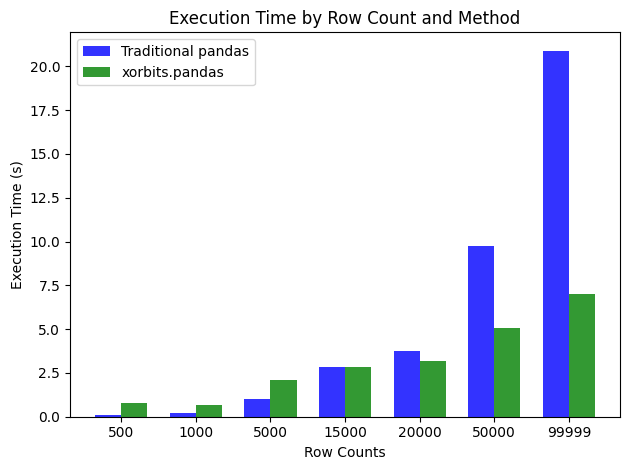

In [7]:
from sentence_transformers import SentenceTransformer
import xorbits.pandas as xor_pd
import pandas as pd
import re
import torch
import time
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SentenceTransformer('average_word_embeddings_komninos', device=device)

def prepare_data_xorbits(data) -> xor_pd.DataFrame:
    print("Preparing data...")
    data["id"] = range(len(data))
    def helper(x):
        count = 0
        idx = -1
        x = str(x)
        for match in re.finditer(r'(?<=[.:;])\s', x):
            count += 1
            if count == 4:
                idx = match.start() if match.start() != match.end() else match.start() + 1
                break
        return x[:idx]

    data['article'] = data['article'].fillna('')
    data['article1'] = data.article.apply(helper)
    
    s2 = data['title'].str.cat(list(data['article1']), sep="")
    
    print('Encoding articles...')
    encoded_articles = s2.apply(lambda x : list(map(float, model.encode(x))))
    data['article_vector'] = encoded_articles
    return data

def prepare_data_pandas(data) -> pd.DataFrame:
    print("Preparing data...")
    data["id"] = range(len(data))
    def helper(x):
        count = 0
        idx = -1
        x = str(x)
        for match in re.finditer(r'(?<=[.:;])\s', x):
            count += 1
            if count == 4:
                idx = match.start() if match.start() != match.end() else match.start() + 1
                break
        return x[:idx]

    data['article'] = data['article'].fillna('')
    data['article1'] = data.article.apply(helper)
    
    s2 = data['title'].str.cat(list(data['article1']), sep="")
    
    print('Encoding articles...')
    encoded_articles = s2.apply(lambda x : list(map(float, model.encode(x))))
    data['article_vector'] = encoded_articles
    return data

row_counts = [500, 1000, 5000, 15000, 20000, 50000, 99999]

# Visualization setup
fig, ax = plt.subplots()
index = range(len(row_counts))
bar_width = 0.35
opacity = 0.8

xor_times = []
pd_times = []

for nrows in row_counts:
    data_pd = pd.read_csv('first_100000_rows.csv', nrows=nrows)
    data_xor = xor_pd.read_csv('first_100000_rows.csv', nrows=nrows)

    start_time_pd = time.time()
    prepare_data_pandas(data_pd)
    end_time_pd = time.time()
    pd_times.append(end_time_pd - start_time_pd)

    start_time_xor = time.time()
    prepare_data_xorbits(data_xor)
    end_time_xor = time.time()
    xor_times.append(end_time_xor - start_time_xor)

rects1 = plt.bar(index, pd_times, bar_width, alpha=opacity, color='b', label='Traditional pandas')
rects2 = plt.bar([p + bar_width for p in index], xor_times, bar_width, alpha=opacity, color='g', label='xorbits.pandas')

plt.xlabel('Row Counts')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time by Row Count and Method')
plt.xticks([p + bar_width / 2 for p in index], row_counts)
plt.legend()

plt.tight_layout()
plt.show()


In [2]:
#xorbits Pandas
from sentence_transformers import SentenceTransformer
import xorbits.pandas as pd
import re
import torch

# Set device to GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SentenceTransformer('average_word_embeddings_komninos', device=device)

def prepare_data(data) -> pd.DataFrame:
    'Preprocesses data and prepares it for upsert.'
    # Add an id column
    print("Preparing data...")
    data["id"] = range(len(data))

    # Extract only first few sentences of each article for quicker vector calculations
    # We made a slight optimization when generating data['article']    
    # Original version:
    # data['article'] = data.article.apply(lambda x: ' '.join(re.split(r'(?<=[.:;])\s', x)[:4]))

    # Optimized version:
    def helper(x):
        count = 0
        idx = -1
        x = str(x)
        for match in re.finditer(r'(?<=[.:;])\s', x):
            count += 1
            if count == 4:
                idx = match.start() if match.start() != match.end() else match.start() + 1
                break
        return x[:idx]

    data['article'] = data['article'].fillna('')
    data['article1'] = data.article.apply(helper)
    
    s2 = data['title'].str.cat(list(data['article1']), sep="")
    
    print('Encoding articles...')
    encoded_articles = s2.apply(lambda x : list(map(float, model.encode(x))))
    data['article_vector'] = encoded_articles
    return data




# Use part of the dataset because using the complete dataset may require more time
data = pd.read_csv('first_100000_rows.csv', nrows=50000)
prepared_data = prepare_data(data)


/Users/antoniozhou/anaconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Preparing data...


100%|██████████| 100.00/100 [00:02<00:00, 33.57it/s]
  0%|          |   0.00/100 [00:00<?, ?it/s]/Users/antoniozhou/anaconda3/lib/python3.11/site-packages/xorbits/_mars/dataframe/base/apply.py:110: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = input_data.apply(
100%|██████████| 100.00/100 [00:00<00:00, 109.51it/s]


Encoding articles...


In [5]:
from pinecone import Pinecone

pc = Pinecone(api_key="3ae37c08-557b-46a8-8e99-fb67029be141")
index = pc.Index("llm")

BATCH_SIZE = 200 # batch size for upserting

def upload_items(data):
    'Uploads data in batches.'
    print("Uploading items...")
    data = data.astype({'id': 'str'})
    items_to_upload = list(zip(list(data['id']),list(data['article_vector'])))

    for i in range(0, len(items_to_upload), BATCH_SIZE):
        index.upsert(vectors=items_to_upload[i:i+BATCH_SIZE])

upload_items(prepared_data)


Uploading items...


  0%|          |   0.00/100 [00:00<?, ?it/s]/Users/antoniozhou/anaconda3/lib/python3.11/site-packages/xorbits/_mars/dataframe/base/apply.py:110: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = input_data.apply(
 81%|████████▏ |  81.25/100 [00:05<00:01, 12.58it/s]/Users/antoniozhou/anaconda3/lib/python3.11/site-packages/xorbits/_mars/dataframe/base/apply.py:110: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = input_data.apply(
100%|██████████| 100.00/100 [00:16<00:00,  6.01it/s]
  0%|          |   0.00/100 [00:00<?, ?it/s]/Users/antoniozhou/anaconda3/lib/python3.11/site-packages/xorbits/_mars/dataframe/base/apply.py:110: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future v

In [6]:
from statistics import mean

sport_user = prepared_data.loc[((prepared_data['section'] == 'Sports News' ) | 
                                (prepared_data['section'] == 'Sports')) &
                                (prepared_data['article'].str.contains('Tennis'))][:15]

display(sport_user[['title', 'article', 'section', 'publication']])


v = sport_user['article_vector']
sport_user_vector = [*map(mean, zip(*v))]

def show_results(res):
    ids = [match.id for match in res.matches]
    scores = [match.score for match in res.matches]
    df = pd.DataFrame({'id': ids, 
                       'score': scores,
                       'title': [prepared_data['title'][int(_id)] for _id in ids],
                       'section': [prepared_data['section'][int(_id)] for _id in ids],
                       'publication': [prepared_data['publication'][int(_id)] for _id in ids]
                        })
    display(df)

results = index.query(vector=sport_user_vector, top_k=5)
show_results(results)

 12%|█▎        |  12.50/100 [00:01<00:07, 12.49it/s]/Users/antoniozhou/anaconda3/lib/python3.11/site-packages/xorbits/_mars/dataframe/base/apply.py:110: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = input_data.apply(
 81%|████████▏ |  81.25/100 [00:06<00:01,  9.44it/s]/Users/antoniozhou/anaconda3/lib/python3.11/site-packages/xorbits/_mars/dataframe/base/apply.py:110: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = input_data.apply(
100%|██████████| 100.00/100 [00:20<00:00,  4.92it/s]


,title,article,section,publication
2261,Son of Borg makes quiet debut on London grassc...,"LONDON (Reuters) - A blonde-haired, blue-eyed ...",Sports News,Reuters
9244,"John McEnroe Says Serena is ""Best Female Playe...",Here we ago again. Almost two decades after sa...,Sports,Vice
12373,Cilic offers Nadal a Wimbledon reality check,LONDON (Reuters) - Spaniard Rafael Nadal got a...,Sports News,Reuters
15910,Women's final delayed by men's semi-final and ...,PARIS (Reuters) - The French Open women’s fina...,Sports News,Reuters
17123,Perth confirmed as host for Fed Cup final,(Reuters) - Perth has been named host city for...,Sports News,Reuters
17259,"Under The Hardwood, The Sand: The Case for Bas...",When basketball was invented by Dr. James Nais...,Sports,Vice
17970,“A Rebel From The Wrong Side of the Tennis Tra...,This article originally appeared on VICE Sport...,Sports,Vice
18410,Fed Cup gets revamp with 12-nation Finals in B...,LONDON (Reuters) - The Fed Cup’s existing form...,Sports News,Reuters
19437,Bernard Tomic's Only Sin Was Being Honest Abou...,You're at happy hour after a long day at the o...,Sports,Vice
25740,"VICE Sports World News Roundup: August 2, 2016","Good morning, America. It's August 2, 2016. We...",Sports,Vice


100%|██████████| 100.00/100 [00:00<00:00, 1061.64it/s]
100%|██████████| 100.00/100 [01:02<00:00,  1.59it/s]


,id,score,title,section,publication
0,22763,0.963041,Serena headed to Wimbledon seeking return to form,Sports News,Reuters
1,35119,0.960860,School girl Gauff turfs idol Venus out of Wimb...,Sports News,Reuters
2,28996,0.960532,Anderson fails to find key to unlock Big Four'...,Sports News,Reuters
3,2261,0.957980,Son of Borg makes quiet debut on London grassc...,Sports News,Reuters
4,45468,0.957906,Tennis: Barty a win away from world number one,Sports News,Reuters


In [4]:
import faiss
import numpy as np
import pandas as pd  # 确保已经导入 pandas


d = 300  

index = faiss.IndexFlatL2(d) 


vectors = np.array(prepared_data['article_vector'].tolist()).astype('float32')
index.add(vectors) 

# Search articles 'tennis'
query = model.encode('tennis')
query = np.array(query).reshape(1, -1).astype('float32')  

k = 10  
D, I = index.search(query, k)  

max_distance = np.max(D)
results = []


for i, idx in enumerate(I[0]):
    article_data = prepared_data.iloc[idx]  
    similarity_score = 1 - D[0][i] / max_distance
    results.append({
        "ID": article_data['id'],
        "Score": similarity_score,
        "Title": article_data['title'],
        "Section": article_data['section'],
        "Publication": article_data['publication']
    })

results_df = pd.DataFrame(results)
display(results_df)


/Users/antoniozhou/anaconda3/lib/python3.11/site-packages/xorbits/core/adapter.py:248: RuntimeWarning: Series.tolist will fallback to Pandas
  warnings.warn(
  0%|          |   0.00/100 [00:00<?, ?it/s]

100%|██████████| 100.00/100 [00:00<00:00, 38625.14it/s]
100%|██████████| 100.00/100 [00:05<00:00, 19.28it/s]
100%|██████████| 100.00/100 [00:00<00:00, 123.99it/s]
100%|██████████| 100.00/100 [00:00<00:00, 135.04it/s]
100%|██████████| 100.00/100 [00:00<00:00, 112.56it/s]
100%|██████████| 100.00/100 [00:00<00:00, 131.30it/s]
100%|██████████| 100.00/100 [00:00<00:00, 112.39it/s]
100%|██████████| 100.00/100 [00:00<00:00, 163.91it/s]
100%|██████████| 100.00/100 [00:00<00:00, 128.31it/s]
100%|██████████| 100.00/100 [00:00<00:00, 120.71it/s]
100%|██████████| 100.00/100 [00:00<00:00, 136.96it/s]
100%|██████████| 100.00/100 [00:00<00:00, 112.60it/s]
100%|██████████| 100.00/100 [00:00<00:00, 143.37it/s]
100%|██████████| 100.00/100 [00:00<00:00, 109.33it/s]
100%|██████████| 100.00/100 [00:00<00:00, 135.35it/s]
100%|██████████| 100.00/100 [00:01<00:00, 70.59it/s] 
100%|██████████| 100.00/100 [00:00<00:00, 142.58it/s]
100%|██████████| 100.00/100 [00:01<00:00, 73.85it/s] 
100%|██████████| 100.00/100

,ID,Score,Title,Section,Publication
0,10869,0.172018,Soccer is the most popular sport on Instagram ...,nan,Vox
1,34956,0.060798,Tennis Legend Margaret Court Went Off the Rail...,Sports,Vice
2,29279,0.055974,Tennis Player Gabriella Taylor's Parents Say S...,Sports,Vice
3,21226,0.046918,How women's tennis just fell into another equa...,nan,Vox
4,12429,0.043076,Tennis Pro Milos on 'Seinfeld' 'Memba Him?!,nan,TMZ
5,38132,0.026589,"Sexism, scandals, and matchmaking: a year of t...",nan,Vox
6,38183,0.025397,Azarenka criticizes gender 'inequality' in tou...,Sustainable Business,Reuters
7,26573,0.014904,Nadal to prepare for Wimbledon at Hurlingham e...,Sports News,Reuters
8,1120,0.014282,Football vs. Soccer Map,nan,Business Insider
9,45324,0.000000,"NFL's Warren Moon Rips Team USA Soccer, 'It's ...",nan,TMZ
